In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
DECISION_STYLE = r"./data/decision_style.csv"
POPRAWNOSC = r"./data/poprawnosc.csv"
CZAS = r"./data/czas_odpowiedzi.csv"
PEWNOSC = r"./data/pewnosc_odpowiedzi.csv"

### Wczytanie potrzebnych informacji z czterech tabeli:

In [3]:
df_decision_style = pd.read_csv(DECISION_STYLE, sep=";", usecols=["User_ID", "Respected", "Confident", "Spontaneous", "Dependent", "Vigilant", "Avoidant", "Brooding", "Intuitive", "Anxious"]).dropna()
df_poprawnosc = pd.read_csv(POPRAWNOSC, sep=";", usecols=["User_ID", "popr_A", "popr_B"]).set_index("User_ID")
df_czas = pd.read_csv(CZAS, sep=";", usecols=["User_ID", "suma_czas_A", "suma_czas_B"]).set_index("User_ID")
df_pewnosc = pd.read_csv(PEWNOSC, sep=";", usecols=["User_ID", "A", "B"]).set_index("User_ID")

## DECISION STYLE

In [4]:
# wyswietlamy początek tabeli
df_decision_style.head(10)

,User_ID,Respected,Confident,Spontaneous,Dependent,Vigilant,Avoidant,Brooding,Intuitive,Anxious
0,Part1,8.0,15.0,4.0,27.0,27.0,15.0,14.0,17.0,16.0
1,Part2,4.0,20.0,8.0,19.0,26.0,12.0,15.0,14.0,8.0
2,Part3,8.0,13.0,8.0,25.0,26.0,18.0,18.0,14.0,19.0
3,Part4,7.0,16.0,7.0,21.0,30.0,17.0,17.0,18.0,23.0
4,Part5,6.0,18.0,6.0,29.0,28.0,20.0,16.0,20.0,19.0
5,Part6,5.0,20.0,12.0,22.0,24.0,10.0,15.0,18.0,18.0
6,Part7,8.0,23.0,13.0,19.0,15.0,8.0,7.0,23.0,9.0
7,Part8,6.0,21.0,9.0,24.0,28.0,13.0,16.0,12.0,12.0
8,Part9,7.0,20.0,12.0,20.0,24.0,13.0,16.0,18.0,13.0
9,Part10,4.0,10.0,16.0,29.0,24.0,11.0,20.0,16.0,20.0


In [5]:
# podstawowe informacje
df_decision_style.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_ID      40 non-null     object 
 1   Respected    40 non-null     float64
 2   Confident    40 non-null     float64
 3   Spontaneous  40 non-null     float64
 4   Dependent    40 non-null     float64
 5   Vigilant     40 non-null     float64
 6   Avoidant     40 non-null     float64
 7   Brooding     40 non-null     float64
 8   Intuitive    40 non-null     float64
 9   Anxious      40 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.4+ KB


In [6]:
# podstawowe statystyki
df_decision_style.describe(percentiles=[.25, .50, .75, .95]).T

,count,mean,std,min,25%,50%,75%,95%,max
Respected,40.0,6.775,1.349026,4.0,6.00,7.0,8.00,8.00,8.0
Confident,40.0,17.575,3.747734,8.0,15.00,18.0,21.00,22.05,24.0
Spontaneous,40.0,10.000,2.621411,4.0,8.00,10.0,11.25,14.10,16.0
Dependent,40.0,22.275,3.993504,12.0,20.00,22.0,24.25,29.00,30.0
Vigilant,40.0,24.825,3.169466,15.0,22.00,25.0,27.00,29.00,30.0
Avoidant,40.0,13.125,4.158325,6.0,9.00,13.0,17.00,19.05,20.0
Brooding,40.0,15.325,3.007576,7.0,14.00,16.0,17.00,20.00,20.0
Intuitive,40.0,17.375,2.852687,12.0,15.00,17.0,19.00,23.00,23.0
Anxious,40.0,14.850,4.258024,8.0,11.75,13.0,18.00,22.00,23.0


Co trzeba poprawić?
1. usunąć "Part" z identyfikatora a nasępnie zamienić typ objektu z object na int, a potem ustawić tą kolumnę jako indeks
2. znormalizować dane (w stosunku do maksymalnego możliwego wyniku dla każdego stylu podejmowania decyzji)

In [7]:
# 1
df_decision_style.User_ID = df_decision_style.User_ID.map(lambda x: x[-1:] if len(x) == 5 else x[-2:]).astype(np.int64)
df_decision_style.set_index("User_ID", inplace=True)

# 2
max = [10, 25, 20, 30, 30, 25, 25, 25, 25]
for i, el in enumerate(df_decision_style.columns):
    df_decision_style[el] = df_decision_style[el].map(lambda x: x*100/max[i]).apply(lambda x: round(x,3))


In [8]:
df_decision_style.head()

,Respected,Confident,Spontaneous,Dependent,Vigilant,Avoidant,Brooding,Intuitive,Anxious
User_ID,,,,,,,,,
1,80.0,60.0,20.0,90.000,90.000,60.0,56.0,68.0,64.0
2,40.0,80.0,40.0,63.333,86.667,48.0,60.0,56.0,32.0
3,80.0,52.0,40.0,83.333,86.667,72.0,72.0,56.0,76.0
4,70.0,64.0,35.0,70.000,100.000,68.0,68.0,72.0,92.0
5,60.0,72.0,30.0,96.667,93.333,80.0,64.0,80.0,76.0


In [9]:
# Szukamy dominującego stylu podejmowania decyzji dla każdego z respondentów (jeśli więcej niż jeden styl uzyskał taką samą (najwyższą) wartość % pokaże wszystkie)
dominated_style = df_decision_style.apply(lambda row: row[row.eq(row.max())].index.to_list(), axis=1)
dominated_style.sample(5)

User_ID
20    [Respected]
42     [Vigilant]
25     [Vigilant]
31     [Vigilant]
2      [Vigilant]
dtype: object

In [10]:
# policzymy udział częstości występowania poszczególnych stylów wg algorytmu - każdy user może dać max 1 pkt dla danego stylu, jeśli dominujące są dwa to dla każdego da po 0.5 pkt itd...
dominated_style.value_counts()

[Vigilant]                18
[Dependent]                7
[Confident]                4
[Dependent, Vigilant]      2
[Confident, Vigilant]      2
[Intuitive]                2
[Confident, Intuitive]     1
[Respected]                1
[Anxious]                  1
[Vigilant, Avoidant]       1
[Respected, Intuitive]     1
dtype: int64

In [11]:
styles = {"Vigilant":18+0.5*2+0.5*2+0.5, "Dependent":7+2*0.5, "Confident":4+2*0.5+0.5, "Intuitive":2+0.5+0.5, "Respected":1+0.5, "Anxious":1, "Avoidant":0.5, "Brooding":0, "Spontaneous":0}
# poszczególne wartości sumują się do 40 - OK

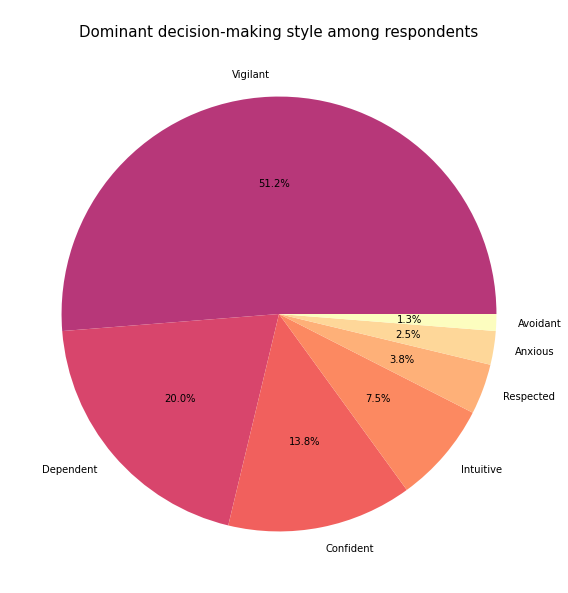

In [12]:
# Wykres kołowy
keys = list(styles.keys())
values = list(styles.values())

keys = [k for k, v in zip(keys, values) if v != 0]
values = [v for v in values if v != 0]
total = sum(values)
cmap = cm.get_cmap('magma')

plt.figure(figsize=(13,10), facecolor='white')
plt.pie(values, labels=keys, colors=cmap(np.linspace(0.5, 1, len(values))), autopct=lambda pct: '{:.1f}%'.format(pct))
plt.title('\nDominant decision-making style among respondents', fontsize=15)

plt.show()

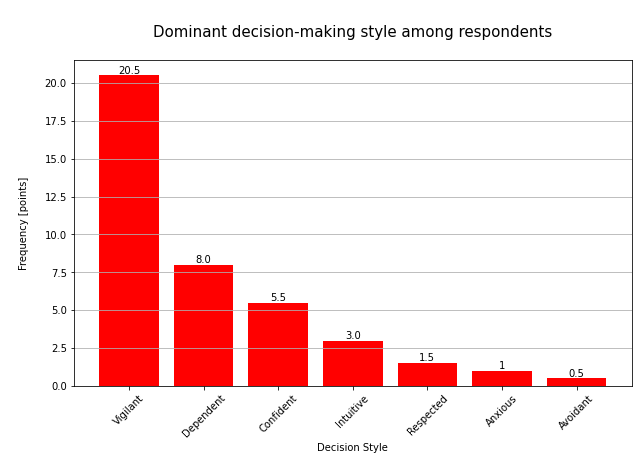

In [13]:
# Wykres słupkowy
plt.figure(figsize=(10,6))
plt.bar(keys, values, color="r")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('\nDominant decision-making style among respondents\n', fontsize=15)
plt.xlabel('Decision Style\n')
plt.ylabel('\nFrequency [points]\n')

for x, y in zip(keys, values):
    plt.text(x, y, y, ha='center', va='bottom')

plt.show()

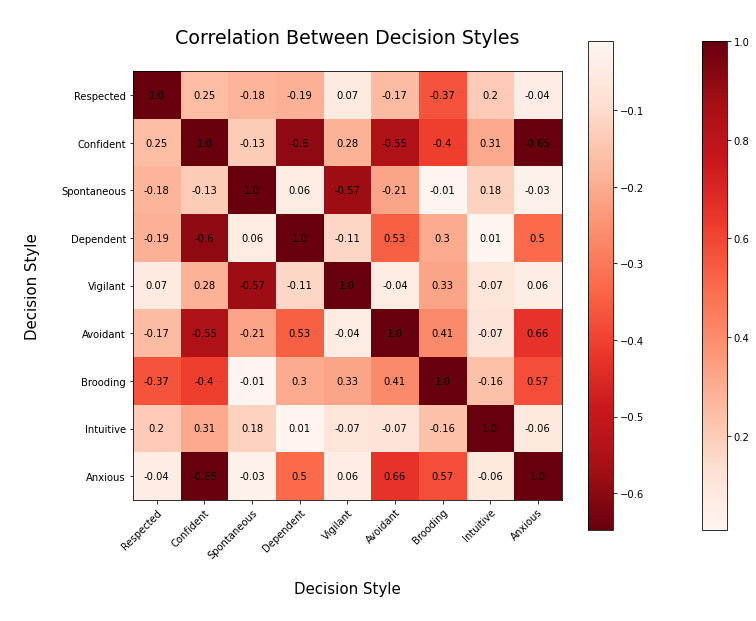

In [14]:
# Sprawdzamy czy zachodzą korelacje między pszczególnymi typami podejmowania decyzji u respondentów (wracamy do danych sprzed wyboru dominującego stylu/stylów)
df_corr_between_decision_styles = df_decision_style.corr()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

mask_positive = np.where(df_corr_between_decision_styles < 0, np.nan, df_corr_between_decision_styles)
mask_negative = np.where(df_corr_between_decision_styles > 0, np.nan, df_corr_between_decision_styles)

im_positive = ax.imshow(mask_positive, cmap='Reds')
im_negative = ax.imshow(mask_negative, cmap='Reds_r')

fig.colorbar(im_positive)
fig.colorbar(im_negative)

ax.set_xticks(np.arange(len(df_corr_between_decision_styles.columns)))
ax.set_xticklabels(df_corr_between_decision_styles.columns)

ax.set_yticks(np.arange(len(df_corr_between_decision_styles.columns)))
ax.set_yticklabels(df_corr_between_decision_styles.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.title('\nCorrelation Between Decision Styles\n', fontsize=19)
plt.xlabel('\nDecision Style\n', fontsize=15)
plt.ylabel('\nDecision Style\n', fontsize=15)

for i in range(len(df_corr_between_decision_styles.columns)):
    for j in range(len(df_corr_between_decision_styles.columns)):
        text = ax.text(j, i, round(df_corr_between_decision_styles.iloc[i, j],2),
                       ha="center", va="center", color="black")

plt.show()


## POPRAWNOŚĆ ODPOWIEDZI A STYL PODEJMOWANIA DECYZJI

In [15]:
df_poprawnosc.head()

,popr_A,popr_B
User_ID,,
1,"62,5",75
2,"87,5",75
3,75,100
4,50,"62,5"
5,100,100


In [16]:
df_poprawnosc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   popr_A  40 non-null     object
 1   popr_B  40 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


Co trzeba poprawić:
- zamienić typ object na float (trzeba zamienić , na .)

In [17]:
df_poprawnosc["popr_A"] = df_poprawnosc["popr_A"].map(lambda x: x.replace(",", ".")).astype(np.float64)
df_poprawnosc["popr_B"] = df_poprawnosc["popr_B"].map(lambda x: x.replace(",", ".")).astype(np.float64)

In [18]:
df_poprawnosc.describe(percentiles=[.25, .50, .75, .95]).T

,count,mean,std,min,25%,50%,75%,95%,max
popr_A,40.0,78.7500,18.388611,25.0,71.875,75.0,90.625,100.0,100.0
popr_B,40.0,79.0625,18.429418,37.5,62.500,75.0,100.000,100.0,100.0


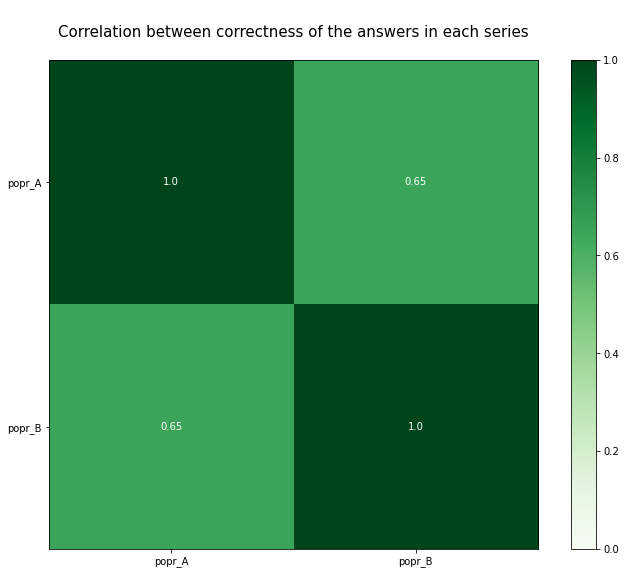

In [19]:
# Sprawdzamy czy zachodzą korelacje między poprawnością odpowiedzi z serii A i B
df_corr_between_corectness = df_poprawnosc.corr()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)

im = ax.imshow(df_corr_between_corectness, cmap='Greens', vmin=0)

fig.colorbar(im)

ax.set_xticks(np.arange(len(df_corr_between_corectness.columns)))
ax.set_xticklabels(df_corr_between_corectness.columns)

ax.set_yticks(np.arange(len(df_corr_between_corectness.columns)))
ax.set_yticklabels(df_corr_between_corectness.columns)

plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")

plt.title('\nCorrelation between correctness of the answers in each series\n', fontsize=15)

for i in range(len(df_corr_between_corectness.columns)):
    for j in range(len(df_corr_between_corectness.columns)):
        text = ax.text(j, i, round(df_corr_between_corectness.iloc[i, j],2),
                       ha="center", va="center", color="w")

plt.show()

### Utworzenie nowej tabelki dla korelacji poszczególnych typów podejmowania decyzji z odpowiednio poprawnością z serii A i B

In [20]:
correlation_A = [df_decision_style[el].corr(df_poprawnosc.popr_A) for i, el in enumerate(df_decision_style.columns)]
correlation_B = [df_decision_style[el].corr(df_poprawnosc.popr_B) for i, el in enumerate(df_decision_style.columns)]
df_corr = pd.DataFrame(index=["A", "B"], columns=df_decision_style.columns, data = [correlation_A, correlation_B]).T
df_corr

,A,B
Respected,-0.158921,-0.168560
Confident,0.139989,0.058122
Spontaneous,-0.046544,-0.059709
Dependent,-0.027500,0.036690
Vigilant,0.050044,0.177095
Avoidant,-0.211675,0.026662
Brooding,-0.028397,0.114349
Intuitive,-0.033605,-0.054106
Anxious,-0.217771,0.032471


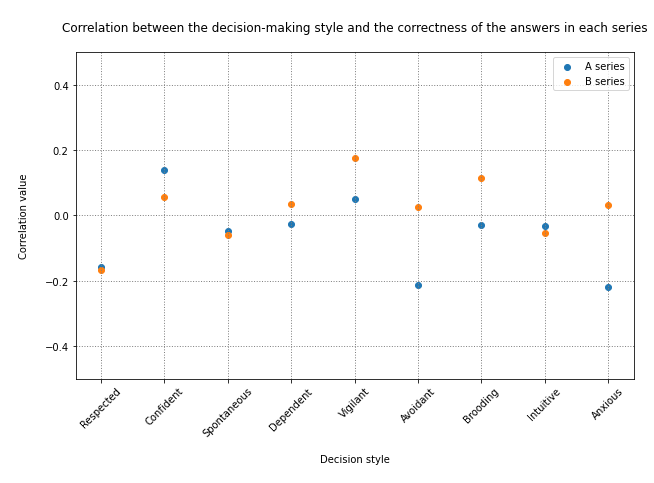

In [22]:
# Wykres
plt.figure(figsize=(10, 6))
plt.ylim((-0.5, 0.5))
plt.grid(which='both', color='gray', linestyle=':', linewidth=1)

plt.scatter(df_corr.index, df_corr['A'], label='A series',)
plt.scatter(df_corr.index, df_corr['B'], label='B series')

plt.title('\nCorrelation between the decision-making style and the correctness of the answers in each series\n')
plt.xlabel('\nDecision style\n')
plt.ylabel('\nCorrelation value\n')
plt.legend()
plt.xticks(rotation=45)

plt.show()

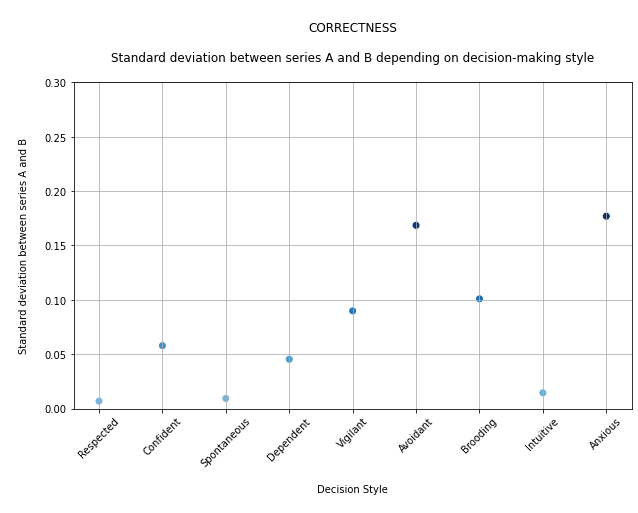

In [24]:
# Wykres - odchylenie standardowe poprawności odpowiedzi w seriach A i B dla poszczególnych stylów podejmowania decyzji
x = df_corr.index
y = df_corr[['A', 'B']].std(axis=1)

plt.figure(figsize=(10, 6))
plt.ylim((0,0.3))
vmin = y.min()-0.15
vmax = y.max()
scatter = plt.scatter(x, y, c=y, cmap='Blues', vmin=vmin, vmax=vmax)

plt.xlabel('\nDecision Style\n')
plt.ylabel('\nStandard deviation between series A and B\n')
plt.title('\nCORRECTNESS\n\nStandard deviation between series A and B depending on decision-making style\n')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## CZAS ODPOWIEDZI A STYL PODEJMOWANIA DECYZJI

In [25]:
df_czas.head()

,suma_czas_A,suma_czas_B
User_ID,,
1,585584,525433
2,933401,902963
3,582787,692629
4,493993,471813
5,854999,819826


In [26]:
df_czas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 42
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   suma_czas_A  40 non-null     int64
 1   suma_czas_B  40 non-null     int64
dtypes: int64(2)
memory usage: 960.0 bytes


In [27]:
df_czas.describe().T

,count,mean,std,min,25%,50%,75%,max
suma_czas_A,40.0,630042.425,160903.195021,394189.0,493161.5,584992.5,716476.25,1060099.0
suma_czas_B,40.0,629492.975,141391.611852,367547.0,543152.5,629366.5,681380.00,1143323.0


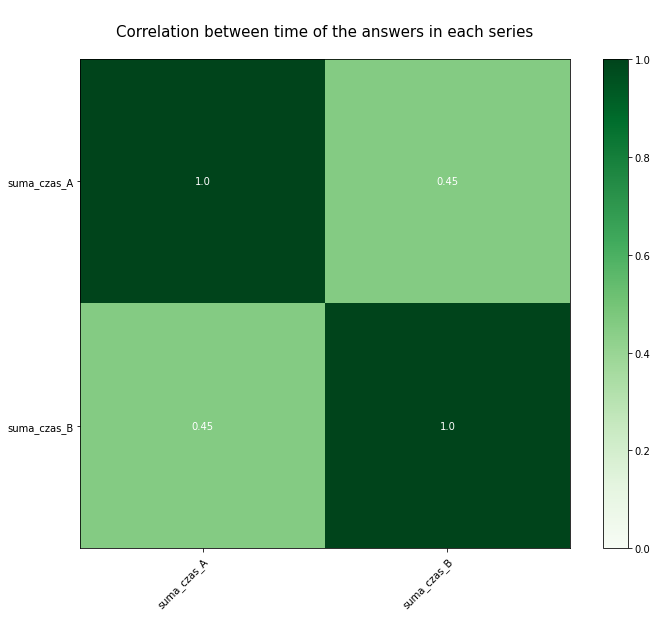

In [28]:
# Sprawdzamy czy zachodzą korelacje między czasem odpowiedzi z serii A i B
df_corr_between_time = df_czas.corr()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
im = ax.imshow(df_corr_between_time, cmap='Greens', vmin=0)
fig.colorbar(im)

ax.set_xticks(np.arange(len(df_corr_between_time.columns)))
ax.set_xticklabels(df_corr_between_time.columns)

ax.set_yticks(np.arange(len(df_corr_between_time.columns)))
ax.set_yticklabels(df_corr_between_time.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('\nCorrelation between time of the answers in each series\n', fontsize=15)

for i in range(len(df_corr_between_time.columns)):
    for j in range(len(df_corr_between_time.columns)):
        text = ax.text(j, i, round(df_corr_between_time.iloc[i, j],2),
                       ha="center", va="center", color="w")

plt.show()

### Utworzenie nowej tabelki dla korelacji poszczególnych typów podejmowania decyzji z odpowiednio czasem udzielenia odpowiedzi z serii A i B

In [29]:
correlation_A = [df_decision_style[el].corr(df_czas.suma_czas_A) for i, el in enumerate(df_decision_style.columns)]
correlation_B = [df_decision_style[el].corr(df_czas.suma_czas_B) for i, el in enumerate(df_decision_style.columns)]
df_corr = pd.DataFrame(index=["czas_A", "czas_B"], columns=df_decision_style.columns, data = [correlation_A, correlation_B]).T
df_corr

,czas_A,czas_B
Respected,-0.224985,-0.112959
Confident,-0.076779,0.105787
Spontaneous,0.029934,0.201498
Dependent,0.164880,0.123103
Vigilant,-0.062696,-0.096026
Avoidant,-0.038015,0.043861
Brooding,-0.144393,0.065359
Intuitive,-0.212740,0.154490
Anxious,-0.183584,-0.047877


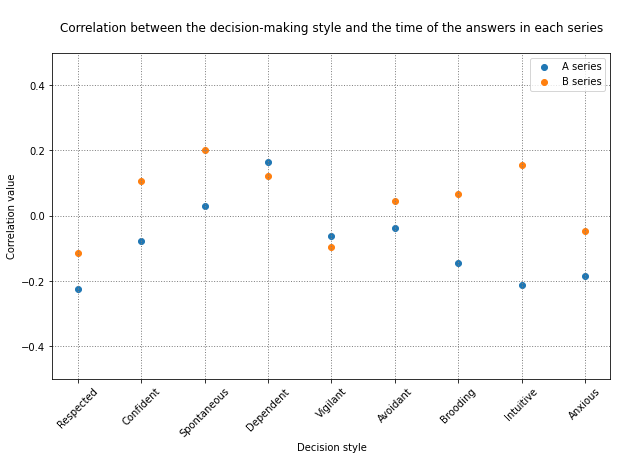

In [30]:
plt.figure(figsize=(10, 6))
plt.ylim((-0.5, 0.5))
plt.grid(which='both', color='gray', linestyle=':', linewidth=1)

plt.scatter(df_corr.index, df_corr['czas_A'], label='A series',)
plt.scatter(df_corr.index, df_corr['czas_B'], label='B series')

plt.title('\nCorrelation between the decision-making style and the time of the answers in each series\n')
plt.xlabel('Decision style')
plt.ylabel('Correlation value')
plt.legend()
plt.xticks(rotation=45)

plt.show()

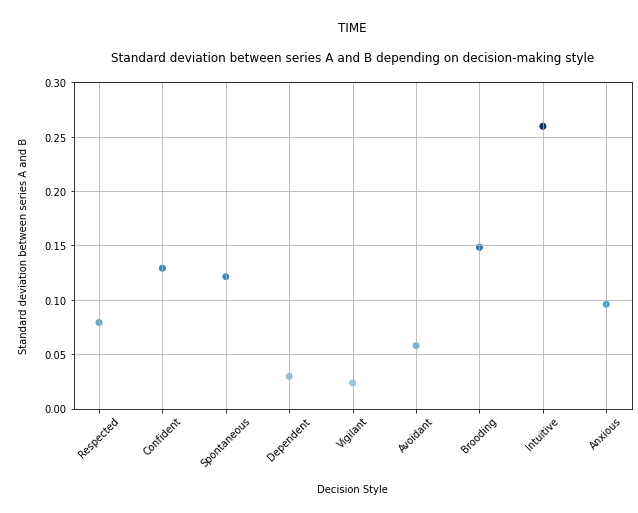

In [33]:
# Wykres - odchylenie standardowe czasu odpowiedzi w seriach A i B dla poszczególnych stylów podejmowania decyzji
x = df_corr.index
y = df_corr[['czas_A', 'czas_B']].std(axis=1)

plt.figure(figsize=(10, 6))
plt.ylim((0,0.3))

vmin = y.min()-0.15
vmax = y.max()
scatter = plt.scatter(x, y, c=y, cmap='Blues', vmin=vmin, vmax=vmax)

plt.xlabel('\nDecision Style\n')
plt.ylabel('\nStandard deviation between series A and B\n')
plt.title('\nTIME\n\nStandard deviation between series A and B depending on decision-making style\n')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## PEWNOŚĆ ODPOWIEDZI A STYL PODEJMOWANIA DECYZJI

In [34]:
df_pewnosc.head()

,A,B
User_ID,,
1,"4,75","4,75"
2,"4,875","4,75"
3,5,5
4,"4,375","4,625"
5,"4,875","4,75"


In [35]:
# podobnie jak w przypadku poprawności -> musimy zamienić przecinki na kropki
df_pewnosc["A"] = df_pewnosc["A"].map(lambda x: x.replace(",", ".")).astype(np.float64)
df_pewnosc["B"] = df_pewnosc["B"].map(lambda x: x.replace(",", ".")).astype(np.float64)

In [36]:
df_pewnosc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       40 non-null     float64
 1   B       40 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes


In [37]:
df_pewnosc.describe().T

,count,mean,std,min,25%,50%,75%,max
A,40.0,4.66875,0.257188,3.875,4.500,4.6875,4.875,5.0
B,40.0,4.69375,0.257811,3.875,4.625,4.7500,4.875,5.0


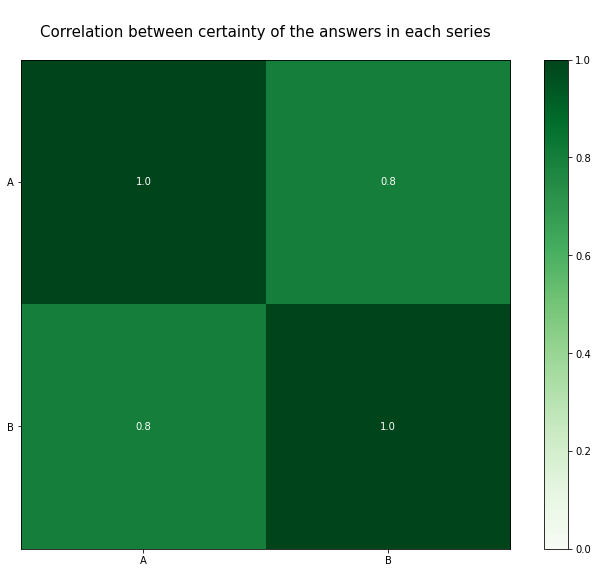

In [39]:
# Sprawdzamy czy zachodzą korelacje między pewnością odpowiedzi z serii A i B
df_corr_between_certainty = df_pewnosc.corr()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
im = ax.imshow(df_corr_between_certainty, cmap='Greens', vmin=0)
fig.colorbar(im)

ax.set_xticks(np.arange(len(df_corr_between_certainty.columns)))
ax.set_xticklabels(df_corr_between_certainty.columns)

ax.set_yticks(np.arange(len(df_corr_between_certainty.columns)))
ax.set_yticklabels(df_corr_between_certainty.columns)

plt.setp(ax.get_xticklabels(), ha="center")
plt.title('\nCorrelation between certainty of the answers in each series\n', fontsize=15)

for i in range(len(df_corr_between_certainty.columns)):
    for j in range(len(df_corr_between_certainty.columns)):
        text = ax.text(j, i, round(df_corr_between_certainty.iloc[i, j],2),
                       ha="center", va="center", color="w")

plt.show()

### Utworzenie nowej tabelki dla korelacji poszczególnych typów podejmowania decyzji z odpowiednio pewnością udzielenia odpowiedzi z serii A i B

In [40]:
correlation_A = [df_decision_style[el].corr(df_pewnosc.A) for i, el in enumerate(df_decision_style.columns)]
correlation_B = [df_decision_style[el].corr(df_pewnosc.B) for i, el in enumerate(df_decision_style.columns)]
df_corr = pd.DataFrame(index=["pewnosc_A", "pewnosc_B"], columns=df_decision_style.columns, data = [correlation_A, correlation_B]).T
df_corr

,pewnosc_A,pewnosc_B
Respected,0.038337,0.027186
Confident,0.245903,0.346153
Spontaneous,-0.304256,-0.275066
Dependent,-0.189890,-0.389294
Vigilant,0.170843,0.140620
Avoidant,0.108638,-0.175644
Brooding,-0.010566,-0.227968
Intuitive,0.068805,0.033775
Anxious,-0.189946,-0.340728


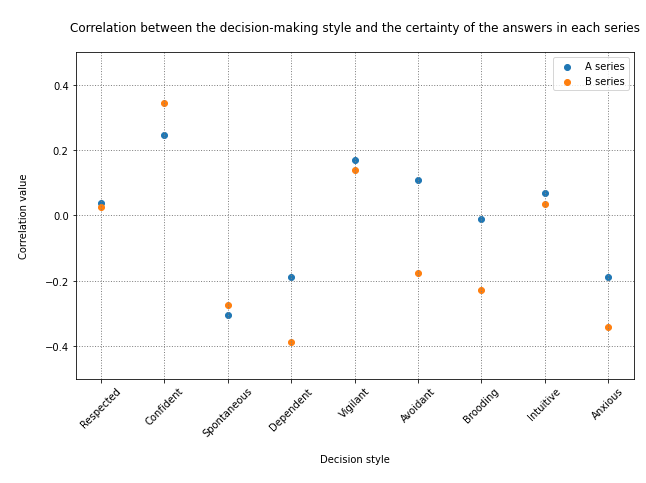

In [43]:
plt.figure(figsize=(10, 6))
plt.ylim((-0.5, 0.5))
plt.grid(which='both', color='gray', linestyle=':', linewidth=1)

plt.scatter(df_corr.index, df_corr['pewnosc_A'], label='A series',)
plt.scatter(df_corr.index, df_corr['pewnosc_B'], label='B series')

plt.title('\nCorrelation between the decision-making style and the certainty of the answers in each series\n')
plt.xlabel('\nDecision style\n')
plt.ylabel('\nCorrelation value\n')
plt.legend()
plt.xticks(rotation=45)

plt.show()

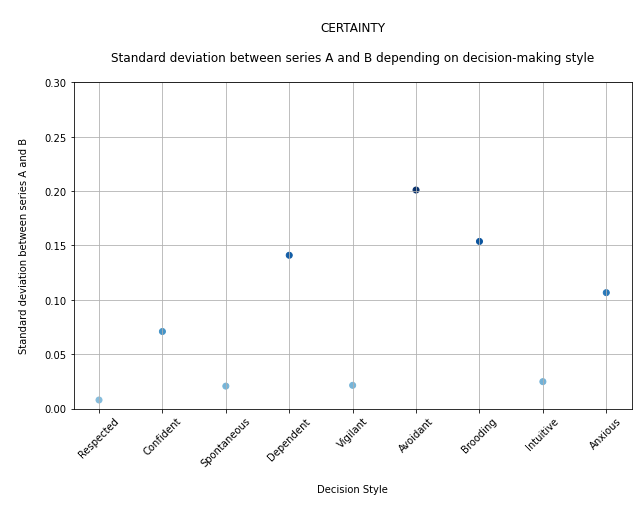

In [42]:
# Wykres - odchylenie standardowe pewności odpowiedzi w seriach A i B dla poszczególnych stylów podejmowania decyzji
x = df_corr.index
y = df_corr[['pewnosc_A', 'pewnosc_B']].std(axis=1)

plt.figure(figsize=(10, 6))
plt.ylim((0,0.3))

vmin = y.min()-0.15
vmax = y.max()
scatter = plt.scatter(x, y, c=y, cmap='Blues', vmin=vmin, vmax=vmax)

plt.xlabel('\nDecision Style\n')
plt.ylabel('\nStandard deviation between series A and B\n')
plt.title('\nCERTAINTY\n\nStandard deviation between series A and B depending on decision-making style\n')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()